<a href="https://colab.research.google.com/github/gayecolakoglu/Malaria_Detection_Deep_Learning/blob/main/CLAHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import cv2
import glob
import imageio
import numpy as np
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
import pathlib
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Packages used
import os
import glob
import shutil
import random
import pandas as pd
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [ ]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.layers import concatenate

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf
from keras.preprocessing import image

In [ ]:
import cv2
import os

In [ ]:
folders=["/content/gdrive/MyDrive/Colab Notebooks/ML/cell_images/Parasitized/","/content/gdrive/MyDrive/Colab Notebooks/ML/cell_images/Uninfected/"]


for folder in folders:  
  for filename in os.listdir(folder):
      print(filename)
      img = cv2.imread(os.path.join(folder,filename))
      try:
        img = cv2.resize(img,(224,224),3) # resize
        print(img.shape)
      except:
        break
      height, width , layers = img.shape
      size=(width,height)
      print(size)
      lab_image = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
      l,a,b = cv2.split(lab_image)
      equ = cv2.equalizeHist(l)
      updated_lab_img = cv2.merge((equ,a,b))
      hist_eq_img = cv2.cvtColor(updated_lab_img,cv2.COLOR_LAB2BGR)
      ###########CLAHE#########################
      #Apply CLAHE to L channel
      clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
      clahe_img = clahe.apply(l)
      #plt.hist(clahe_img.flat, bins=100, range=(0,255))

      #Combine the CLAHE enhanced L-channel back with A and B channels
      updated_lab_img2 = cv2.merge((clahe_img,a,b))

      #Convert LAB image back to color (RGB)
      CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)
      if folder=="/content/gdrive/MyDrive/Colab Notebooks/ML/cell_images/Uninfected/":
        cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/ML/CLAHE/Uninfected/'+filename,CLAHE_img)
      elif folder=="/content/gdrive/MyDrive/Colab Notebooks/ML/cell_images/Parasitized/":
        cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/ML/CLAHE/Parasitized/'+filename,CLAHE_img)
      else:
        print("wrong folder")


Görüntülenen çıkış son 5000 satıra kısaltıldı.
(224, 224, 3)
(224, 224)
C122P83ThinF_IMG_20151002_145751_cell_138.png
(224, 224, 3)
(224, 224)
C122P83ThinF_IMG_20151002_145751_cell_23.png
(224, 224, 3)
(224, 224)
C122P83ThinF_IMG_20151002_145751_cell_7.png
(224, 224, 3)
(224, 224)
C122P83ThinF_IMG_20151002_145751_cell_81.png
(224, 224, 3)
(224, 224)
C122P83ThinF_IMG_20151002_145751_cell_96.png
(224, 224, 3)
(224, 224)
C122P83ThinF_IMG_20151002_145918_cell_106.png
(224, 224, 3)
(224, 224)
C122P83ThinF_IMG_20151002_145918_cell_136.png
(224, 224, 3)
(224, 224)
C122P83ThinF_IMG_20151002_145918_cell_18.png
(224, 224, 3)
(224, 224)
C122P83ThinF_IMG_20151002_145918_cell_31.png
(224, 224, 3)
(224, 224)
C122P83ThinF_IMG_20151002_145918_cell_6.png
(224, 224, 3)
(224, 224)
C122P83ThinF_IMG_20151002_145918_cell_87.png
(224, 224, 3)
(224, 224)
C122P83ThinF_IMG_20151002_145918_cell_95.png
(224, 224, 3)
(224, 224)
C122P83ThinF_IMG_20151002_150207_cell_114.png
(224, 224, 3)
(224, 224)
C122P83ThinF_IMG

In [ ]:
#this directory contains same data, we can delete it
#import shutil

#shutil.rmtree('/content/gdrive/MyDrive/Colab Notebooks/ML/cell_images/cell_images')

In [ ]:
data_dir = "/content/gdrive/MyDrive/Colab Notebooks/ML/CLAHE"
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('Parasitized/*.png')))
print(image_count)

999


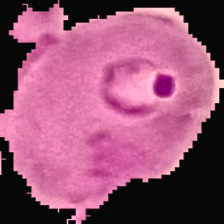

In [ ]:
import PIL
PIL.Image.open(str(list(data_dir.glob('Parasitized/*.png'))[6]))

In [ ]:
image_count = len(list(data_dir.glob('Uninfected/*.png')))
print(image_count)

11112


In [ ]:
PIL.Image.open(str(list(data_dir.glob('Uninfected/*.png'))[0]))

13779


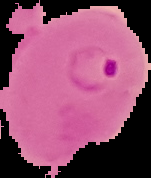

In [ ]:
data_dir = "/content/gdrive/MyDrive/Colab Notebooks/ML/cell_images"
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('Parasitized/*.png')))
print(image_count)
PIL.Image.open(str(list(data_dir.glob('Parasitized/*.png'))[6]))


11112


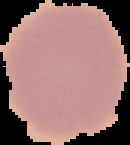

In [ ]:
image_count = len(list(data_dir.glob('Uninfected/*.png')))
print(image_count)
PIL.Image.open(str(list(data_dir.glob('Uninfected/*.png'))[6]))